In [23]:
from tensorflow.keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization,\
     Flatten, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import layers
from tensorflow.keras.initializers import glorot_uniform
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [26]:
train_images = train_images/255.0
test_images = test_images/255.0

In [27]:
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

In [28]:
train_images.shape

(60000, 28, 28, 1)

In [29]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [30]:
classess = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [31]:
def DWSamp2D(X):
    X = Conv2D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = Conv2D(16, 2, activation='relu', padding='same')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Conv2D(32, 2, activation='relu', padding='same')(X)
    X = Conv2D(32, 2, activation='relu', padding='same')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)
#     X = MaxPooling2D(pool_size=(2, 2))(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = MaxPooling2D(pool_size=(1, 1))(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = MaxPooling2D(pool_size=(1, 1))(X)
    return X

In [32]:
def UpSamp2D(X):
#     X = UpSampling2D(size=(1, 1))(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)   
#     X = UpSampling2D(size=(1, 1))(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)
#     X = Conv2D(128, 3, activation='relu', padding='same')(X)   
#     X = UpSampling2D(size=(2, 2))(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)
#     X = Conv2D(64, 3, activation='relu', padding='same')(X)   
    X = UpSampling2D(size=(2, 2))(X)
    X = Conv2D(32, 2, activation='relu', padding='same')(X)
    X = Conv2D(32, 2, activation='relu', padding='same')(X)
    X = UpSampling2D(size=(2, 2))(X)
    X = Conv2D(16, 2, activation='relu', padding='same')(X)
    X = Conv2D(16, 2, activation='relu', padding='same')(X)
    X = Flatten()(X)
    X = Dense(len(classess), activation='softmax')(X)
    return X

In [33]:
def UNET(input_shape = (w, h, 1), classes = classess):
    X_input = Input(shape = input_shape)
    X = DWSamp2D(X_input)
    X = UpSamp2D(X)
    model = Model(inputs = X_input, outputs = X, name = 'U-net')
    return model

In [34]:
#Clear unnecessary memory
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()

In [35]:
model = UNET(input_shape = (w, h, 1), classes = classess)
model.summary()

Model: "U-net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4128      
                                                             

In [36]:
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [37]:
# Compile the model
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, 
                    train_labels,
                    batch_size = 1024,
                    validation_split=0.15,
                    epochs = 10,
                    callbacks= [tensorboard_callback])

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 12s 241us/sample - loss: 0.8274 - accuracy: 0.7414 - val_loss: 0.2064 - val_accuracy: 0.9376
Epoch 2/10
51000/51000 [==============================] - 10s 191us/sample - loss: 0.1671 - accuracy: 0.9485 - val_loss: 0.1516 - val_accuracy: 0.9528
Epoch 3/10
51000/51000 [==============================] - 11s 211us/sample - loss: 0.1099 - accuracy: 0.9661 - val_loss: 0.0782 - val_accuracy: 0.9767
Epoch 4/10
51000/51000 [==============================] - 11s 225us/sample - loss: 0.0760 - accuracy: 0.9765 - val_loss: 0.0721 - val_accuracy: 0.9766
Epoch 5/10
51000/51000 [==============================] - 11s 215us/sample - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 6/10
51000/51000 [==============================] - 11s 210us/sample - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 7/10
51000/51000 [=====================

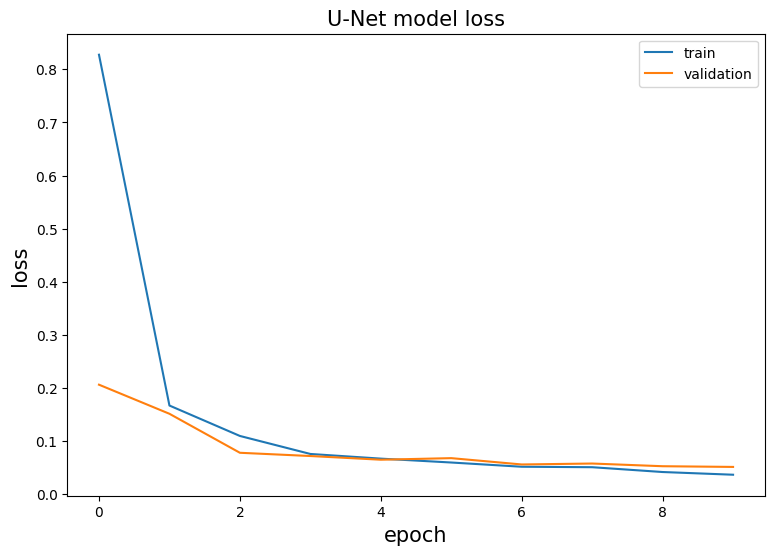

In [39]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('U-Net model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

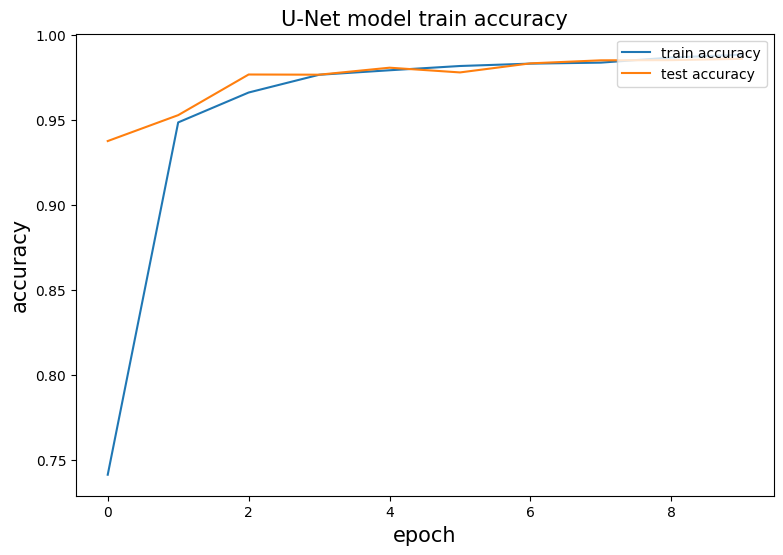

In [40]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('U-Net model train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [41]:
# Evaluating the model using the test set
loss, accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\nTest accuracy:', accuracy)


Test accuracy: 0.9886


In [42]:
predictions = model.predict(test_images)

In [43]:
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)


# Cifar's label need to reshape to scalar array
test_labels = test_labels.reshape(10000, )



# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classess[predicted_label],
                                100*np.max(predictions_array),
                                classess[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

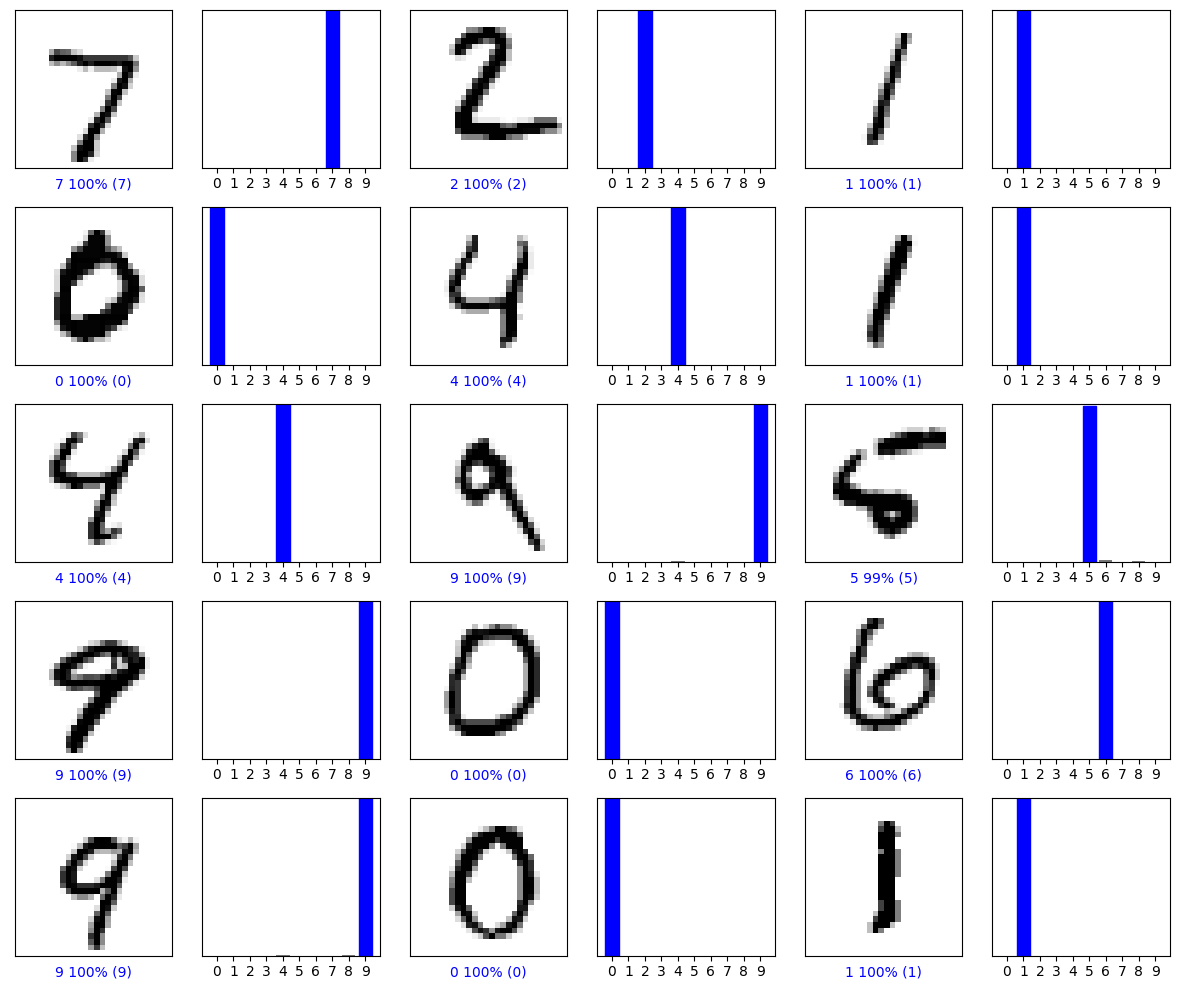

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()